### Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot  as plt
from tenpair import *
from time import time
from bfs import BFS
from dfs import DFS
from itdep import IDDFS
from astar import aStar

In [ ]:
def getMoves(node):
    path = []
    while node.parents != []:
        path.append(node.parents[0].data)
        node = node.parents[0].fromNode
    
    return path[::-1]    

In [80]:
def timeToRun(func, n=50):
    times=[]
    for _ in range(n):
        start = time()
        ret = func()
        end = time()
        times.append(end-start)
    return getMoves(ret), (sum(times)/len(times))

# Uninformed Search

## BFS

### Visiting repeated Nodes and Always dealing

###### level 0

In [81]:
board, moves = initialState(0)
moves_bfs_0, time_bfs_0 = timeToRun(lambda : BFS(board))
"N moves: "+str(len(moves_bfs_0)) + "; Time: " + str(time_bfs_0) + " seconds."

'N moves: 2; Time: 0.0006591320037841797 seconds.'

###### level 1

In [82]:
board, moves = initialState(1)
moves_bfs_1, time_bfs_1 = timeToRun(lambda : BFS(board))
"N moves: "+str(len(moves_bfs_1)) + "; Time: " + str(time_bfs_1) + " seconds."

'N moves: 4; Time: 0.009880027770996093 seconds.'

### Not Repeating Nodes and Always Dealing

###### level 0

In [83]:
board, moves = initialState(0)
moves_bfs_NR_0, time_bfs_NR_0 = timeToRun(lambda : BFS(board, noRepeat=True))
"N moves: "+str(len(moves_bfs_NR_0)) + "; Time: " + str(time_bfs_NR_0) + " seconds."

'N moves: 2; Time: 0.0007207870483398437 seconds.'

###### level 1

In [84]:
board, moves = initialState(1)
moves_bfs_NR_1, time_bfs_NR_1 = timeToRun(lambda : BFS(board, noRepeat=True))
"N moves: "+str(len(moves_bfs_NR_1)) + "; Time: " + str(time_bfs_NR_1) + " seconds."

'N moves: 4; Time: 0.008139967918395996 seconds.'

### Repeating Nodes and Dealing only on the first move

###### level 0

In [85]:
board, moves = initialState(0)
moves_bfs_DO_0, time_bfs_DO_0 = timeToRun(lambda : BFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_bfs_DO_0)) + "; Time: " + str(time_bfs_DO_1) + " seconds."

'N moves: 2; Time: 0.006006002426147461 seconds.'

###### level 1

In [86]:
board, moves = initialState(1)
moves_bfs_DO_1, time_bfs_DO_1 = timeToRun(lambda : BFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_bfs_DO_1)) + "; Time: " + str(time_bfs_DO_1) + " seconds."

'N moves: 4; Time: 0.003440861701965332 seconds.'

### Not Repeating and Dealing only on the first move

###### level 0

In [87]:
board, moves = initialState(0)
moves_bfs_NR_DO_0, time_bfs_NR_DO_0 = timeToRun(lambda : BFS(board, noRepeat=True, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_bfs_NR_DO_0)) + "; Time: " + str(time_bfs_NR_DO_0) + " seconds."

'N moves: 2; Time: 0.0006400060653686524 seconds.'

###### level 1

In [88]:
board, moves = initialState(1)
moves_bfs_NR_DO_1, time_bfs_NR_DO_1 = timeToRun(lambda : BFS(board, noRepeat=True, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_bfs_NR_DO_1)) + "; Time: " + str(time_bfs_NR_DO_1) + " seconds."

'N moves: 4; Time: 0.0020200300216674807 seconds.'

###### level 2

In [91]:
board, moves = initialState(2)
moves_bfs_NR_DO_2, time_bfs_NR_DO_2 = timeToRun(lambda : BFS(board, noRepeat=True, shouldDealOnlyFirst=True),1)
"N moves: "+str(len(moves_bfs_NR_DO_2)) + "; Time: " + str(time_bfs_NR_DO_2) + " seconds."

'N moves: 6; Time: 28.3431134223938 seconds.'

###### level 3

In [52]:
board, moves = initialState(3)
moves_bfs_NR_DO_3, time_bfs_NR_DO_3 = timeToRun(lambda : BFS(board, noRepeat=True, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_bfs_NR_DO_3)) + "; Time: " + str(time_bfs_NR_DO_3) + " seconds."

'N moves: 13; Time: 0.7890515327453613 seconds.'

In [135]:
bfs_times = [time_bfs_0,time_bfs_1]
bfs_NR_times = [time_bfs_NR_0,time_bfs_NR_1]
bfs_DO_times = [time_bfs_DO_0,time_bfs_DO_1]
bfs_NR_DO_times = [time_bfs_NR_DO_0,time_bfs_NR_DO_1,time_bfs_NR_DO_2,time_bfs_NR_DO_3]

bfs_moves = [moves_bfs_0,moves_bfs_1]
bfs_NR_moves = [moves_bfs_NR_0,moves_bfs_NR_1]
bfs_DO_moves = [moves_bfs_DO_0,moves_bfs_DO_1]
bfs_NR_DO_moves = [moves_bfs_NR_DO_0,moves_bfs_NR_DO_1,moves_bfs_NR_DO_2,moves_bfs_NR_DO_3]

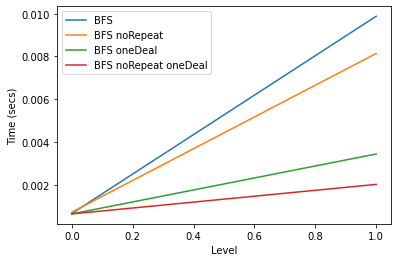

In [144]:
plt.plot(range(len(bfs_times)),bfs_times, label="BFS")
plt.plot(range(len(bfs_NR_times)),bfs_NR_times,label="BFS noRepeat")
plt.plot(range(len(bfs_DO_times)),bfs_DO_times,label="BFS oneDeal")
plt.plot(range(len(bfs_NR_DO_times[:2])),bfs_NR_DO_times[:2],label="BFS noRepeat oneDeal")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

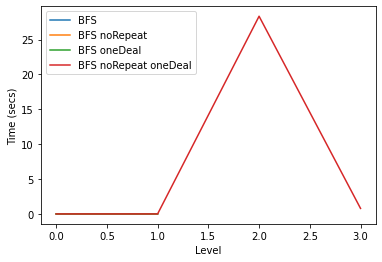

In [145]:
plt.plot(range(len(bfs_times)),bfs_times, label="BFS")
plt.plot(range(len(bfs_NR_times)),bfs_NR_times,label="BFS noRepeat")
plt.plot(range(len(bfs_DO_times)),bfs_DO_times,label="BFS oneDeal")
plt.plot(range(len(bfs_NR_DO_times)),bfs_NR_DO_times,label="BFS noRepeat oneDeal")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

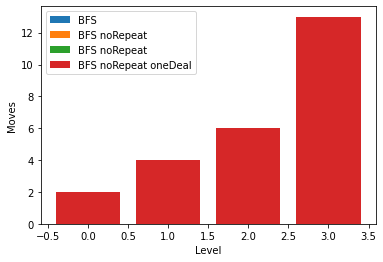

In [183]:
plt.bar(range(len(bfs_moves)), [len(moves) for moves in bfs_moves], label="BFS")
plt.bar(range(len(bfs_NR_moves)), [len(moves) for moves in bfs_NR_moves], label="BFS noRepeat")
plt.bar(range(len(bfs_DO_moves)), [len(moves) for moves in bfs_DO_moves], label="BFS noRepeat")
plt.bar(range(len(bfs_NR_DO_moves)),[len(moves) for moves in bfs_NR_DO_moves], label="BFS noRepeat oneDeal")
plt.legend(loc="upper left")
plt.xlabel("Level")
plt.ylabel("Moves")
plt.show()

## DFS

### No depth limit and always dealing

###### level 0

In [53]:
board, moves = initialState(0)
moves_dfs_0, time_dfs_0 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_0)) + "; Time: " + str(time_dfs_0) + " seconds."

'N moves: 2; Time: 0.0009932518005371094 seconds.'

###### level 1

In [57]:
board, moves = initialState(1)
moves_dfs_1, time_dfs_1 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_1)) + "; Time: " + str(time_dfs_1) + " seconds."

'N moves: 4; Time: 0.0 seconds.'

###### level 2

In [58]:
board, moves = initialState(2)
moves_dfs_2, time_dfs_2 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_2)) + "; Time: " + str(time_dfs_2) + " seconds."

'N moves: 9; Time: 0.001001119613647461 seconds.'

###### level 3

In [59]:
board, moves = initialState(3)
moves_dfs_3, time_dfs_3 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_3)) + "; Time: " + str(time_dfs_3) + " seconds."

'N moves: 13; Time: 0.002005338668823242 seconds.'

###### level 4

In [60]:
board, moves = initialState(4)
moves_dfs_4, time_dfs_4 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_4)) + "; Time: " + str(time_dfs_4) + " seconds."

'N moves: 9; Time: 0.0009992122650146484 seconds.'

###### level 5

In [62]:
board, moves = initialState(5)
moves_dfs_5, time_dfs_5 = timeToRun(lambda : DFS(board))
"N moves: "+str(len(moves_dfs_5)) + "; Time: " + str(time_dfs_5) + " seconds."

'N moves: 29; Time: 0.004000186920166016 seconds.'

### No Depth limit and only deal first 

###### level 0

In [63]:
board, moves = initialState(0)
moves_dfs_DO_0, time_dfs_DO_0 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_0)) + "; Time: " + str(time_dfs_DO_0) + " seconds."

'N moves: 2; Time: 0.0 seconds.'

###### level 1

In [65]:
board, moves = initialState(1)
moves_dfs_DO_1, time_dfs_DO_1 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_1)) + "; Time: " + str(time_dfs_DO_1) + " seconds."

'N moves: 4; Time: 0.0009975433349609375 seconds.'

###### level 2

In [66]:
board, moves = initialState(2)
moves_dfs_DO_2, time_dfs_DO_2 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_2)) + "; Time: " + str(time_dfs_DO_2) + " seconds."

'N moves: 6; Time: 0.0019991397857666016 seconds.'

###### level 3

In [69]:
board, moves = initialState(3)
moves_dfs_DO_3, time_dfs_DO_3 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_3)) + "; Time: " + str(time_dfs_DO_3) + " seconds."

'N moves: 13; Time: 0.0019609928131103516 seconds.'

###### level 4

In [70]:
board, moves = initialState(4)
moves_dfs_DO_4, time_dfs_DO_4 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_4)) + "; Time: " + str(time_dfs_DO_4) + " seconds."

'N moves: 9; Time: 0.0 seconds.'

###### level 5

In [71]:
board, moves = initialState(5)
moves_dfs_DO_5, time_dfs_DO_5 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_5)) + "; Time: " + str(time_dfs_DO_5) + " seconds."

'N moves: 9; Time: 0.0010101795196533203 seconds.'

###### level 6

In [73]:
board, moves = initialState(6)
moves_dfs_DO_6, time_dfs_DO_6 = timeToRun(lambda : DFS(board, shouldDealOnlyFirst=True))
"N moves: "+str(len(moves_dfs_DO_6)) + "; Time: " + str(time_dfs_DO_6) + " seconds."

'N moves: 28; Time: 0.04600334167480469 seconds.'

In [158]:
dfs_times = [time_dfs_0,time_dfs_1,time_dfs_2,time_dfs_3,time_dfs_4,time_dfs_5]
dfs_DO_times = [time_dfs_DO_0,time_dfs_DO_1,time_dfs_DO_2,time_dfs_DO_3,time_dfs_DO_4,time_dfs_DO_5,time_dfs_DO_6]

dfs_moves = [moves_dfs_0,moves_dfs_1,moves_dfs_2,moves_dfs_3,moves_dfs_4,moves_dfs_5]
dfs_DO_moves = [moves_dfs_DO_0,moves_dfs_DO_1,moves_dfs_DO_2,moves_dfs_DO_3,moves_dfs_DO_4,moves_dfs_DO_5,moves_dfs_DO_6]

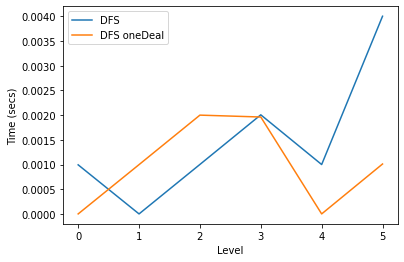

In [155]:
plt.plot(range(len(dfs_times)),dfs_times, label="DFS")
plt.plot(range(len(dfs_DO_times[:6])),dfs_DO_times[:6], label="DFS oneDeal")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

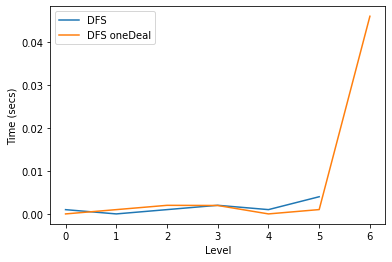

In [156]:
plt.plot(range(len(dfs_times)),dfs_times, label="DFS")
plt.plot(range(len(dfs_DO_times)),dfs_DO_times, label="DFS oneDeal")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

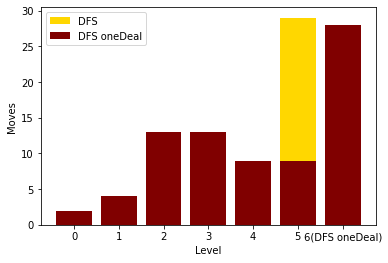

In [160]:
plt.bar(['0','1','2','3','4','5'], [len(moves) for moves in dfs_moves] , color="gold", label="DFS")
plt.bar(['0','1','2','3','4','5','6(DFS oneDeal)'],[len(moves) for moves in dfs_DO_moves], label="DFS oneDeal", color="maroon")
plt.legend(loc="upper left")
plt.xlabel("Level")
plt.ylabel("Moves")
plt.show()

## Iterative Deepening

###### level 0

In [161]:
board, moves = initialState(0)
moves_idep_0, time_idep_0 = timeToRun(lambda : IDDFS(board, 27))
"N moves: "+str(len(moves_idep_0)) + "; Time: " + str(time_idep_0) + " seconds."

'N moves: 2; Time: 0.00016011714935302735 seconds.'

###### level 1

In [162]:
board, moves = initialState(1)
moves_idep_1, time_idep_1 = timeToRun(lambda : IDDFS(board, 10))
"N moves: "+str(len(moves_idep_1)) + "; Time: " + str(time_idep_1) + " seconds."

'N moves: 4; Time: 0.0014400339126586913 seconds.'

###### level 2

In [74]:
board, moves = initialState(2)
moves_idep_2, time_idep_2 = timeToRun(lambda : IDDFS(board, 10))
"N moves: "+str(len(moves_idep_2)) + "; Time: " + str(time_idep_2) + " seconds."

'N moves: 6; Time: 14.297888040542603 seconds.'

In [169]:
idep_times = [time_idep_0, time_idep_1, time_idep_2]
idep_moves = [moves_idep_0, moves_idep_1, moves_idep_2]

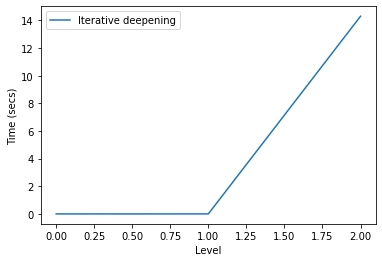

In [170]:
plt.plot(range(len(idep_times)),idep_times, label="Iterative deepening")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

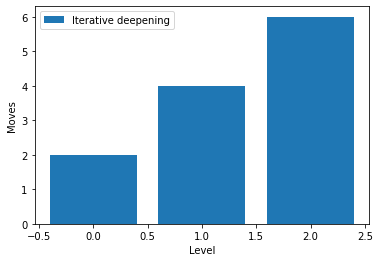

In [171]:
plt.bar(range(len(idep_moves)), [len(moves) for moves in idep_moves], label="Iterative deepening")
plt.legend(loc="upper left")
plt.xlabel("Level")
plt.ylabel("Moves")
plt.show()

## A*

###### level 0

In [92]:
board, moves = initialState(0)
moves_astar_0, time_astar_0 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_0)) + "; Time: " + str(time_astar_0) + " seconds."

'N moves: 2; Time: 0.0003192043304443359 seconds.'

###### level 1

In [93]:
board, moves = initialState(1)
moves_astar_1, time_astar_1 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_1)) + "; Time: " + str(time_astar_1) + " seconds."

'N moves: 4; Time: 0.00025995731353759764 seconds.'

###### level 2

In [94]:
board, moves = initialState(2)
moves_astar_2, time_astar_2 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_2)) + "; Time: " + str(time_astar_2) + " seconds."

'N moves: 6; Time: 0.004039859771728516 seconds.'

###### level 3

In [99]:
board, moves = initialState(3)
moves_astar_3, time_astar_3 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_3)) + "; Time: " + str(time_astar_3) + " seconds."

'N moves: 13; Time: 0.03197999954223633 seconds.'

###### level 4

In [96]:
board, moves = initialState(4)
moves_astar_4, time_astar_4 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_4)) + "; Time: " + str(time_astar_4) + " seconds."

'N moves: 9; Time: 0.005200715065002442 seconds.'

###### level 5

In [97]:
board, moves = initialState(5)
moves_astar_5, time_astar_5 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_5)) + "; Time: " + str(time_astar_5) + " seconds."

'N moves: 9; Time: 0.01404005527496338 seconds.'

###### level 6

In [ ]:
board, moves = initialState(6)
moves_astar_6, time_astar_6 = timeToRun(lambda : aStar(board))
"N moves: "+str(len(moves_astar_6)) + "; Time: " + str(time_astar_6) + " seconds."

In [172]:
astar_times = [time_astar_0,time_astar_1,time_astar_2,time_astar_3,time_astar_4,time_astar_5]
astar_moves = [moves_astar_0, moves_astar_1,moves_astar_2,moves_astar_3,moves_astar_4,moves_astar_5]

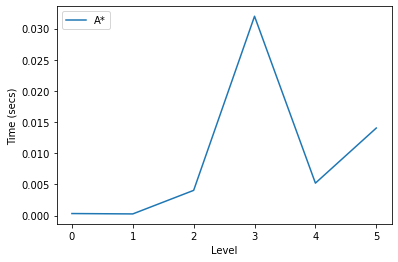

In [173]:
plt.plot(range(len(astar_times)), astar_times, label="A*")
plt.legend(loc="upper left")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

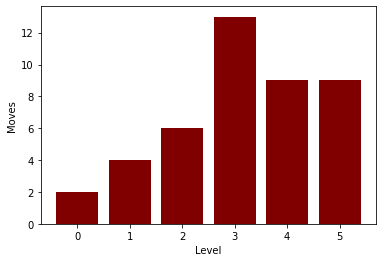

In [174]:
plt.bar(range(len(astar_moves)),[len(move) for move in astar_moves], color="maroon")
plt.xlabel("Level")
plt.ylabel("Moves")
plt.show()

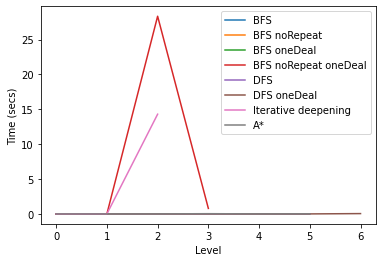

In [186]:
plt.plot(range(len(bfs_times)),bfs_times, label="BFS")
plt.plot(range(len(bfs_NR_times)),bfs_NR_times,label="BFS noRepeat")
plt.plot(range(len(bfs_DO_times)),bfs_DO_times,label="BFS oneDeal")
plt.plot(range(len(bfs_NR_DO_times)),bfs_NR_DO_times,label="BFS noRepeat oneDeal")
plt.plot(range(len(dfs_times)),dfs_times, label="DFS")
plt.plot(range(len(dfs_DO_times)),dfs_DO_times, label="DFS oneDeal")
plt.plot(range(len(idep_times)),idep_times, label="Iterative deepening")
plt.plot(range(len(astar_times)), astar_times, label="A*")
plt.legend(loc="upper right")
plt.xlabel('Level')
plt.ylabel('Time (secs)')
plt.show()

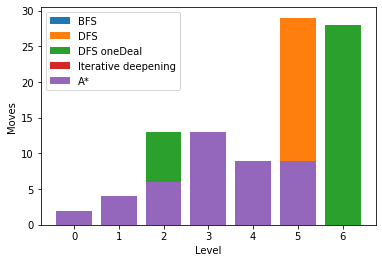

In [182]:
plt.bar(range(len(bfs_moves)), [len(moves) for moves in bfs_moves], label="BFS")
plt.bar(range(len(dfs_moves)), [len(moves) for moves in dfs_moves], label="DFS")
plt.bar(range(len(dfs_DO_moves)), [len(moves) for moves in dfs_DO_moves], label="DFS oneDeal")
plt.bar(range(len(idep_moves)), [len(moves) for moves in idep_moves], label="Iterative deepening")
plt.bar(range(len(astar_moves)),[len(move) for move in astar_moves], label="A*")
plt.legend(loc="upper left")
plt.xlabel("Level")
plt.ylabel("Moves")
plt.show()